# SI 671 Final Project
### Lechen Zhang (leczhang@umich.edu)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import math
import seaborn as sns

# 1. Load data and Preprocess

In [2]:
df = pd.read_csv("NYPD_Complaint_Data_Historic.csv")
df["count"] = 1
df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"])
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,count
0,261167635,2022-01-29,15:00:00,12/19/2022,13:30:00,70.0,12/31/2022,104,RAPE,157.0,...,(null),<18,BLACK,F,13513.0,60.0,2.0,18.0,43.0,1
1,261169068,2022-03-14,00:00:00,07/07/2022,00:00:00,113.0,12/31/2022,112,THEFT-FRAUD,739.0,...,(null),UNKNOWN,UNKNOWN,F,24669.0,41.0,3.0,46.0,71.0,1
2,261161448,2022-02-26,12:00:00,06/01/2022,12:00:00,19.0,12/31/2022,340,FRAUDS,718.0,...,(null),25-44,WHITE,F,12083.0,23.0,4.0,51.0,11.0,1
3,261181072,2022-12-31,21:00:00,12/31/2022,21:07:00,114.0,12/31/2022,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,(null),<18,BLACK,M,16863.0,39.0,3.0,33.0,72.0,1
4,261169028,2022-12-31,21:30:00,12/31/2022,21:36:00,72.0,12/31/2022,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,(null),45-64,WHITE HISPANIC,F,13515.0,9.0,2.0,7.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841670,191753642,2019-01-01,17:25:00,01/01/2019,17:30:00,44.0,01/01/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,(null),UNKNOWN,UNKNOWN,E,10930.0,50.0,5.0,42.0,27.0,1
1841671,191753669,2019-01-01,07:56:00,01/01/2019,07:57:00,79.0,01/01/2019,341,PETIT LARCENY,333.0,...,(null),UNKNOWN,UNKNOWN,D,18181.0,69.0,2.0,49.0,51.0,1
1841672,191765989,2019-01-01,12:31:00,01/01/2019,12:40:00,103.0,01/01/2019,578,HARRASSMENT 2,638.0,...,(null),45-64,BLACK,F,24340.0,41.0,3.0,6.0,61.0,1
1841673,191706868,2019-01-01,02:30:00,01/01/2019,03:00:00,101.0,01/01/2019,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,(null),25-44,WHITE,M,20529.0,51.0,3.0,47.0,59.0,1


In [3]:
df_time = df.groupby("CMPLNT_FR_DT").sum()[["count"]]
df_time

,count
CMPLNT_FR_DT,
2019-01-01,2157
2019-01-02,1250
2019-01-03,1267
2019-01-04,1354
2019-01-05,1160
...,...
2022-12-27,1131
2022-12-28,1178
2022-12-29,1159


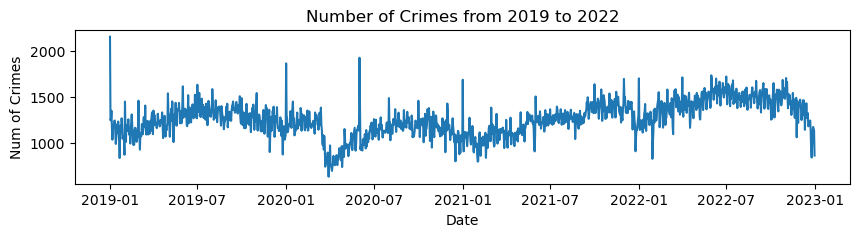

In [4]:
plt.figure(figsize=(10,2))
plt.plot(df_time)
plt.xlabel("Date")
plt.ylabel("Num of Crimes")
#plt.legend(top5_daily.columns)
plt.title("Number of Crimes from 2019 to 2022")
plt.show()

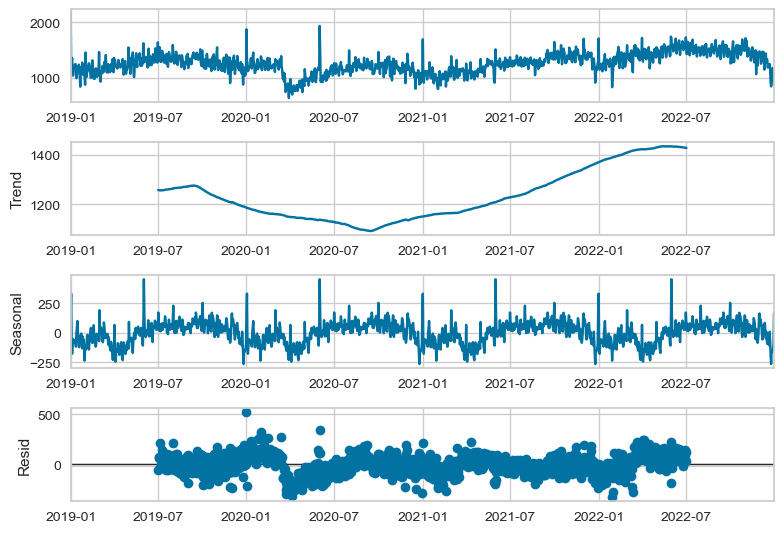

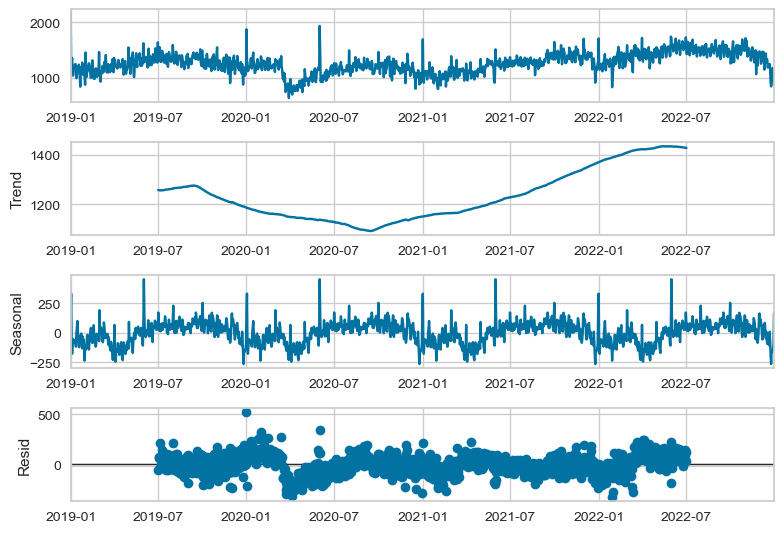

In [18]:
df_time_sea = seasonal_decompose(df_time, model="additive", period=365)
df_time_sea.plot()

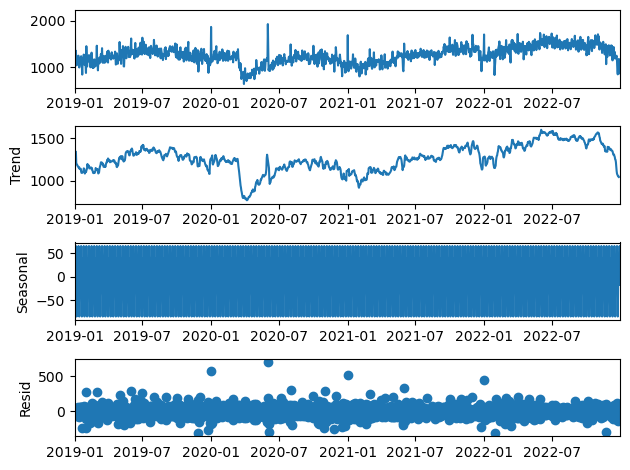

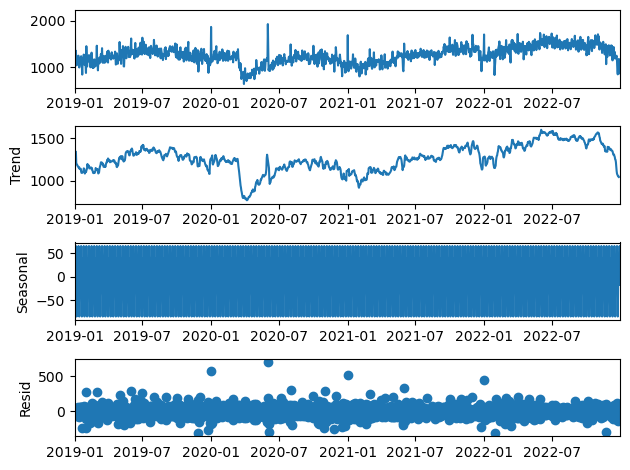

In [5]:
df_time_sea = seasonal_decompose(df_time, model="additive")
df_time_sea.plot()

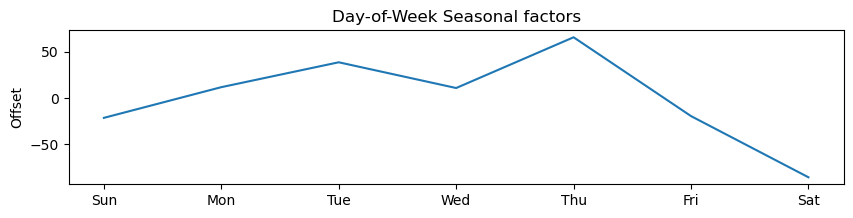

In [6]:
df_time_weekday = df_time.reset_index()
df_time_weekday["weekday"] = df_time_weekday["CMPLNT_FR_DT"].apply(lambda x: datetime.weekday(x))
df_time_weekday = df_time_weekday.groupby("weekday").mean()
df_time_weekday = df_time_weekday - df_time_weekday.mean()

plt.figure(figsize=(10,2))
plt.plot(['Sun', 'Mon', "Tue", "Wed", "Thu", "Fri", "Sat"], df_time_weekday["count"])


plt.ylabel("Offset")
plt.title("Day-of-Week Seasonal factors")
plt.show()

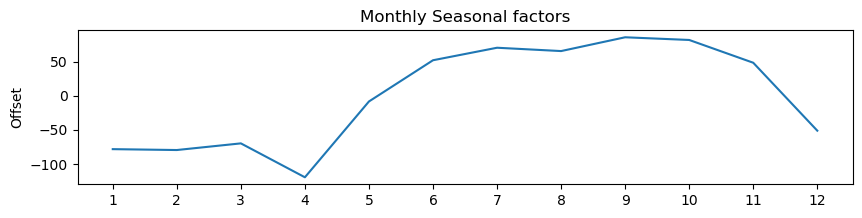

In [7]:
df_time_weekday = df_time.reset_index()
df_time_weekday["weekday"] = df_time_weekday["CMPLNT_FR_DT"].apply(lambda x: x.month)
df_time_weekday = df_time_weekday.groupby("weekday").mean()
df_time_weekday = df_time_weekday - df_time_weekday.mean()

plt.figure(figsize=(10,2))
plt.plot(df_time_weekday)

plt.ylabel("Offset")
plt.title("Monthly Seasonal factors")
plt.xticks(df_time_weekday.index)
plt.show()

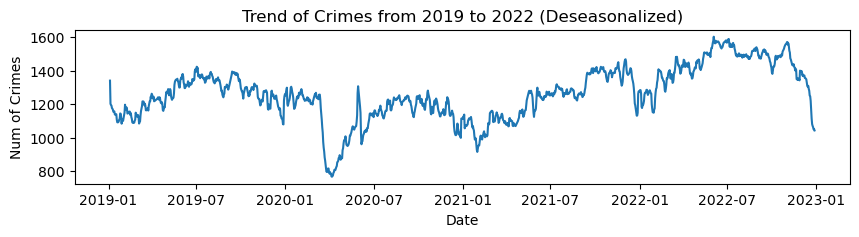

In [8]:
plt.figure(figsize=(10,2))
plt.plot(df_time_sea.trend)
plt.xlabel("Date")
plt.ylabel("Num of Crimes")
#plt.legend(top5_daily.columns)
plt.title("Trend of Crimes from 2019 to 2022 (Deseasonalized)")
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='count'>

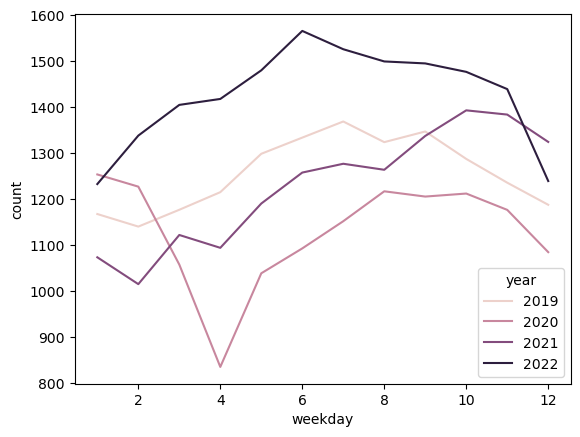

In [9]:
df_time_weekday = df_time.reset_index()
df_time_weekday["weekday"] = df_time_weekday["CMPLNT_FR_DT"].apply(lambda x: x.month)
df_time_weekday["year"] = df_time_weekday["CMPLNT_FR_DT"].apply(lambda x: x.year)
df_time_weekday = df_time_weekday.groupby(["year", "weekday"]).mean().reset_index()
#df_time_weekday = df_time_weekday - df_time_weekday.mean()

sns.lineplot(data=df_time_weekday, x="weekday", y="count", hue="year")

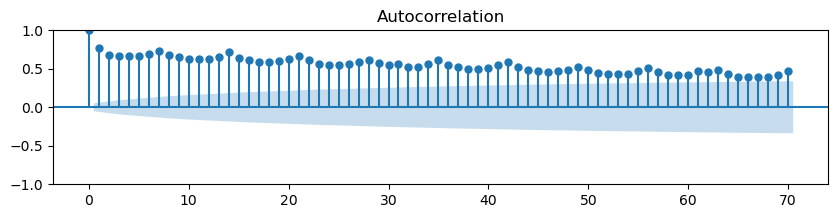

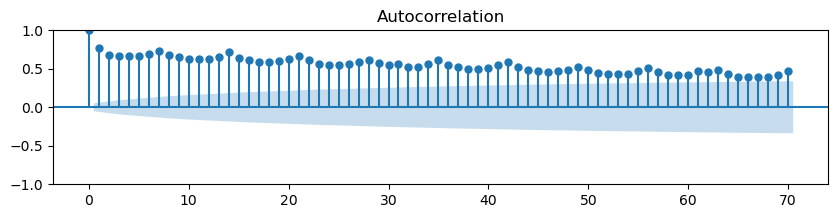

In [174]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, axes = plt.subplots(1,1,figsize=(10,2), dpi= 100)
plot_acf(df_time["count"].tolist(), lags=70, ax=axes)
#plot_pacf(df_time["count"].tolist(), lags=70, ax=axes[1])

# 2. Similarity

In [195]:
df_time_borough = pd.pivot_table(df, values='count', index=['CMPLNT_FR_DT'],columns=['BORO_NM'], aggfunc="sum").fillna(0).drop(columns=["(null)"])
df_time_borough

BORO_NM,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
CMPLNT_FR_DT,,,,,
2019-01-01,408.0,632.0,544.0,463.0,110.0
2019-01-02,297.0,345.0,326.0,230.0,52.0
2019-01-03,273.0,372.0,322.0,242.0,58.0
2019-01-04,299.0,383.0,358.0,258.0,56.0
2019-01-05,263.0,353.0,247.0,236.0,61.0
...,...,...,...,...,...
2022-12-27,257.0,333.0,264.0,220.0,55.0
2022-12-28,280.0,320.0,285.0,230.0,62.0
2022-12-29,268.0,307.0,272.0,250.0,61.0


In [209]:
df_time_borough_rescaled = (df_time_borough - df_time_borough.mean(axis = 0))/df_time_borough.std(axis = 0)

In [479]:
def sea_decomp(df):
    new_df = df.copy()
    for col in df.columns:
        new_df[col] = seasonal_decompose(df[col], model="additive").trend
    return new_df

sea_decomp(df_time_borough)

BORO_NM,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
CMPLNT_FR_DT,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN
2019-01-04,288.000000,388.571429,333.142857,266.714286,63.428571
2019-01-05,265.428571,347.857143,299.285714,233.000000,55.857143
...,...,...,...,...,...
2022-12-27,251.285714,284.142857,236.714286,224.428571,53.142857
2022-12-28,242.428571,284.285714,240.142857,222.000000,52.714286
2022-12-29,NaN,NaN,NaN,NaN,NaN


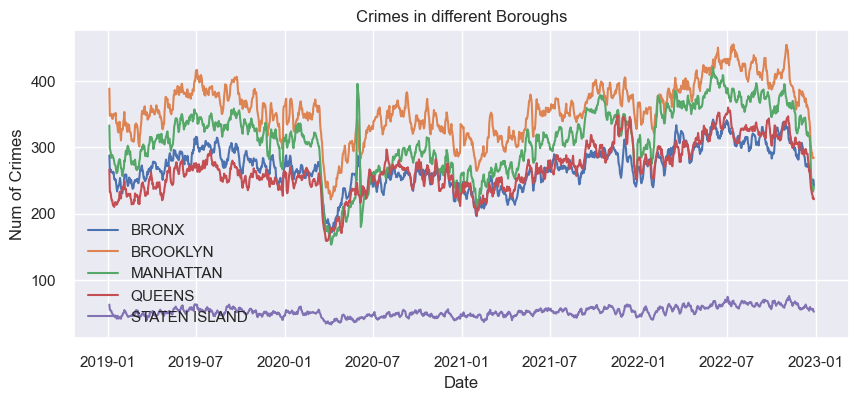

In [486]:
plt.figure(figsize=(10,4))
plt.plot(sea_decomp(df_time_borough))
plt.xlabel("Date")
plt.ylabel("Num of Crimes")
plt.legend(df_time_borough.columns)
plt.title("Crimes in different Boroughs")
plt.show()

Text(0.5, 1.0, 'Euclidean Distance')

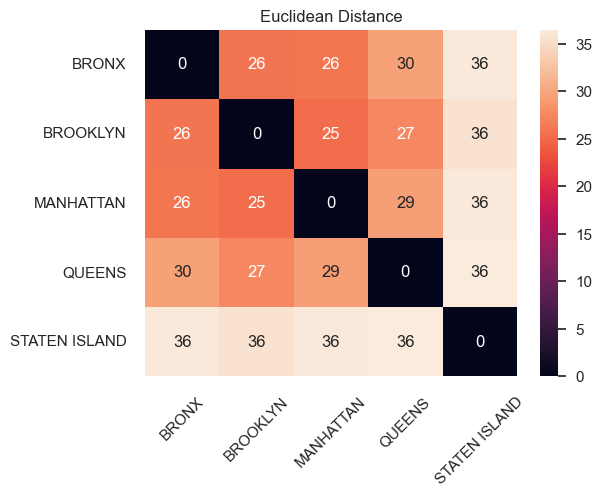

In [505]:
def calc_euclidean_dist(df):
    dist = np.zeros((len(df.columns), len(df.columns)))
    for i, i_col in enumerate(df.columns):
        for j, j_col in enumerate(df.columns):
            dist[i][j] = sum((df[i_col] - df[j_col]) ** 2) ** 0.5
    dist = pd.DataFrame(dist, index=df.columns, columns=df.columns)
    return dist

sns.set(rc={'figure.figsize':(6,4.5)})
sns.heatmap(calc_euclidean_dist(df_time_borough_rescaled), annot=True)
plt.xticks(rotation=45)
plt.ylabel("")
plt.xlabel("")
plt.title("Euclidean Distance")


Text(0.5, 1.0, 'Cosine Similarity')

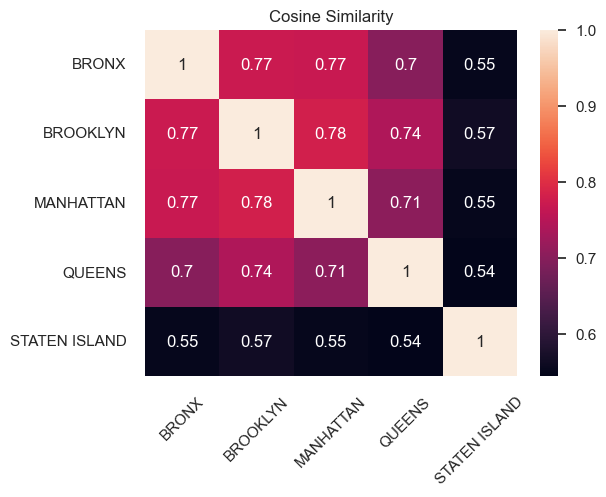

In [506]:
def calc_cos_sim(df):
    dist = np.zeros((len(df.columns), len(df.columns)))
    for i, i_col in enumerate(df.columns):
        for j, j_col in enumerate(df.columns):
            dist[i][j] = np.dot(df[i_col], df[j_col]) / (sum(df[i_col] ** 2) ** 0.5) / (sum(df[j_col] ** 2) ** 0.5)
    dist = pd.DataFrame(dist, index=df.columns, columns=df.columns)
    return dist


sns.set(rc={'figure.figsize':(6,4.5)})
sns.heatmap(calc_cos_sim(df_time_borough_rescaled), annot=True)
plt.xticks(rotation=45)
plt.ylabel("")
plt.xlabel("")
plt.title("Cosine Similarity")

In [216]:
def calc_pairwise_dtw_cost(x, y, ret_matrix=True):
    dtw = np.zeros((len(y)+1, len(x)+1))
    for i in range(len(y)+1):
        for j in range(len(x)+1):
            dtw[i, j] = np.inf
    dtw[0, 0] = 0
    
    for i in range(1, len(y)+1):
        for j in range(1, len(x)+1):
            cost = (y[i-1] - x[j-1]) ** 2
            dtw[i, j] = cost + min(dtw[i-1, j], dtw[i, j-1], dtw[i-1, j-1])
    
    if(ret_matrix):
        return dtw[1:, 1:]
    else:
        return dtw[len(y), len(x)]
    
def calc_dtw_cost(df):
    dist = np.zeros((len(df.columns), len(df.columns)))
    for i, i_col in enumerate(df.columns):
        for j, j_col in enumerate(df.columns):
            dist[i][j] = calc_pairwise_dtw_cost(df[i_col], df[j_col], False)
    dist = pd.DataFrame(dist, index=df.columns, columns=df.columns)
    return dist

dtw_cost = calc_dtw_cost(df_time_borough_rescaled)
dtw_cost

BORO_NM,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
BORO_NM,,,,,
BRONX,0.000000,266.401905,295.838323,325.412254,451.396511
BROOKLYN,266.401905,0.000000,301.434354,286.354553,454.900725
MANHATTAN,295.838323,301.434354,0.000000,346.890524,559.224688
QUEENS,325.412254,286.354553,346.890524,0.000000,492.946509
STATEN ISLAND,451.396511,454.900725,559.224688,492.946509,0.000000


<AxesSubplot:xlabel='BORO_NM', ylabel='BORO_NM'>

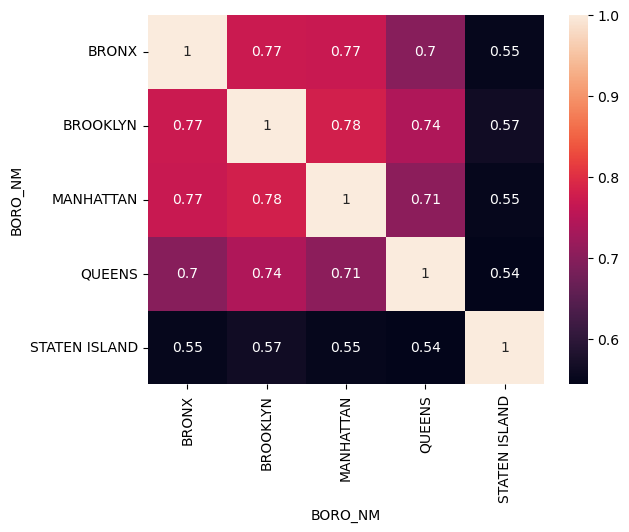

In [215]:
sns.heatmap(calc_cos_sim(df_time_borough_rescaled), annot=True)

Text(0.5, 1.0, 'DTW Cost')

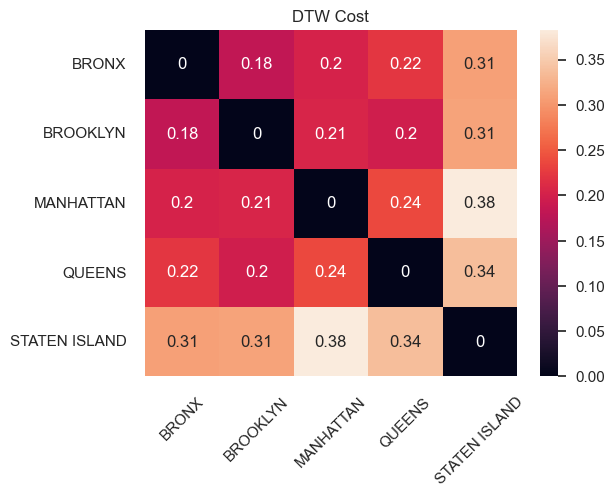

In [507]:
sns.set(rc={'figure.figsize':(6,4.5)})
sns.heatmap(dtw_cost/len(df_time_borough_rescaled), annot=True)
plt.xticks(rotation=45)
plt.ylabel("")
plt.xlabel("")
plt.title("DTW Cost")

# 3. Prediction

In [ ]:
from pycaret.time_series import *

df_time_temp = df_time

df_time_month_train = df_time_temp[list(pd.Series(df_time_temp.index).apply(lambda x: x.year) < 2022)]
df_time_month_test = df_time_temp[list(pd.Series(df_time_temp.index).apply(lambda x: x.year) == 2022)]

s = setup(df_time_month_train, target="count", fh = 7, session_id = 123, numeric_imputation_target="linear")

In [405]:
from pycaret.time_series import *

df_time_temp = pd.DataFrame(df_time_sea.trend)
df_time_temp['count'] = df_time_temp['trend']
df_time_temp = df_time_temp.drop(columns = ["trend"])
df_time_temp = df_time_temp.dropna()
#df_time_temp['count'] = df_time_temp['count'].rolling(30).sum()

df_time_temp["month"] = list(pd.Series(df_time_temp.index).apply(lambda x: str(x.month)))
df_time_temp = pd.get_dummies(df_time_temp, columns=['month'])

df_time_month_train = df_time_temp[list(pd.Series(df_time_temp.index).apply(lambda x: x.year) < 2022)]
df_time_month_test = df_time_temp[list(pd.Series(df_time_temp.index).apply(lambda x: x.year) == 2022)]

s = setup(df_time_month_train, target="count", fh = 30, session_id = 123, numeric_imputation_target="linear", max_sp_to_consider=366)

,Description,Value
0,session_id,123
1,Target,count
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1093, 13)"
5,Transformed data shape,"(1093, 13)"
6,Transformed train set shape,"(1063, 13)"
7,Transformed test set shape,"(30, 13)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [10]:
from pycaret.time_series import *

df_time_month = df_time.reset_index()
df_time_month["year"] = df_time_month["CMPLNT_FR_DT"].apply(lambda x: x.year)
df_time_month["month"] = df_time_month["CMPLNT_FR_DT"].apply(lambda x: x.month)
df_time_month = df_time_month.groupby(["year", "month"]).sum()
df_time_month.index = pd.date_range(start='2019-01-01', end = '2022-12-01', freq = 'MS')

df_time_month_train = df_time_month[list(pd.Series(df_time_month.index).apply(lambda x: x.year) < 2022)]
df_time_month_test = df_time_month[list(pd.Series(df_time_month.index).apply(lambda x: x.year) == 2022)]

s = setup(df_time_month_train, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,count
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(36, 1)"
5,Transformed data shape,"(36, 1)"
6,Transformed train set shape,"(33, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [518]:
best = compare_models(errors="raise")

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,0.5689,0.5136,1726.5449,2022.0376,0.0532,0.0509,-0.2987,0.0467
exp_smooth,Exponential Smoothing,0.6062,0.5427,1839.5548,2136.2070,0.0564,0.0541,-0.4213,0.0833
naive,Naive Forecaster,0.7077,0.6285,2158.1111,2466.9639,0.0628,0.0619,-8.1819,0.0233
theta,Theta Forecaster,0.7132,0.6860,2168.1867,2689.4857,0.0629,0.0631,-4.2847,0.0300
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.8669,0.7905,2648.0548,3102.6055,0.0764,0.0753,-18.1671,0.1400
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8902,0.7353,2716.6134,2877.0034,0.0751,0.0775,-17.8382,0.0767
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.9415,0.8922,2879.2467,3496.9846,0.0812,0.0820,-30.5353,0.0567
stlf,STLF,0.9672,0.8694,2935.5947,3407.2361,0.0854,0.0875,-4.9058,0.0333
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.9681,0.9046,2961.4480,3545.6540,0.0835,0.0844,-34.7202,0.0667
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.9681,0.9046,2961.4480,3545.6541,0.0835,0.0844,-34.7202,0.0567


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

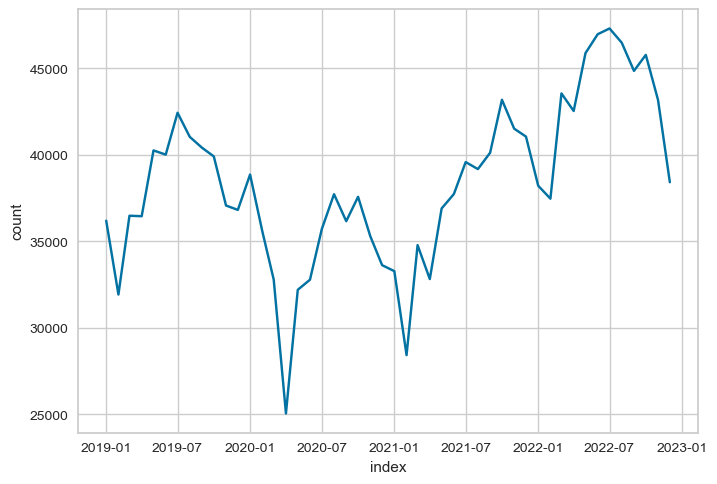

In [433]:
predictions = predict_model(best, fh = 12+3)
predictions = predictions.reset_index()
predictions['index'] = predictions['index'].apply(lambda x: x.to_timestamp())

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-12,1.0856,0.9887,3294.8313,3918.0649,0.1091,0.1008,-1.0843
1,2021-03,0.6111,0.5282,1845.5067,2056.2659,0.0504,0.0517,0.0822
2,2021-06,0.1219,0.1112,378.3264,434.2902,0.0096,0.0097,-0.2617
Mean,NaT,0.6062,0.5427,1839.5548,2136.2070,0.0564,0.0541,-0.4213
SD,NaT,0.3934,0.3584,1190.6656,1423.3680,0.0408,0.0373,0.4894


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-12,0.8591,0.9606,2607.3991,3806.8901,0.0889,0.0809,-0.9677
1,2021-03,0.8272,0.6832,2498.2860,2659.7699,0.0688,0.0707,-0.5356
2,2021-06,0.9143,0.7276,2838.4792,2841.1564,0.0716,0.0743,-52.9978
Mean,NaT,0.8669,0.7905,2648.0548,3102.6055,0.0764,0.0753,-18.1671
SD,NaT,0.0360,0.1217,141.8274,503.4798,0.0089,0.0042,24.6297


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

<AxesSubplot:xlabel='index', ylabel='y_pred'>

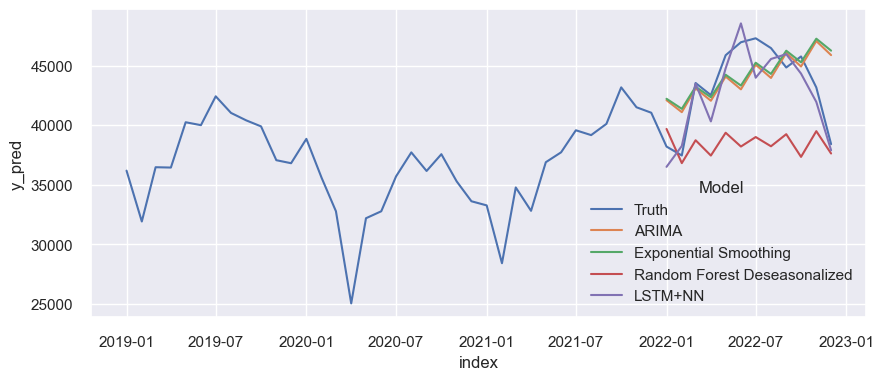

In [519]:
sns.lineplot(data=df_time_month.reset_index(), x='index', y="count")
predictions = predict_model(best, fh = 12+3)
predictions['Model'] = "ARIMA"

origin = df_time_month.reset_index()
origin["y_pred"] = origin["count"]
origin = origin.drop(columns=["count"])
origin['Model'] = "Truth"

#naive = create_model('arima')
#arima = predict_model(naive, fh = 12+3)
#arima['Model'] = "ARIMA"

naive = create_model('exp_smooth')
exp_smooth = predict_model(naive, fh = 12+3)
exp_smooth['Model'] = "Exponential Smoothing"

naive = create_model('rf_cds_dt')
rf_cds_dt = predict_model(naive, fh = 12+3)
rf_cds_dt['Model'] = "Random Forest Deseasonalized"

lstm = pd.read_csv("lstm_pred.csv")

predictions = pd.concat([predictions, exp_smooth, rf_cds_dt])

predictions = predictions.reset_index()
predictions['index'] = predictions['index'].apply(lambda x: x.to_timestamp())
predictions = predictions[predictions['index'].apply(lambda x: x.year) >= 2022]

predictions = pd.concat([origin, predictions, lstm], ignore_index=True)

sns.set(rc={'figure.figsize':(10,4)})
sns.lineplot(data=predictions, x='index', y="y_pred", hue="Model")

<AxesSubplot:xlabel='index', ylabel='y_pred'>

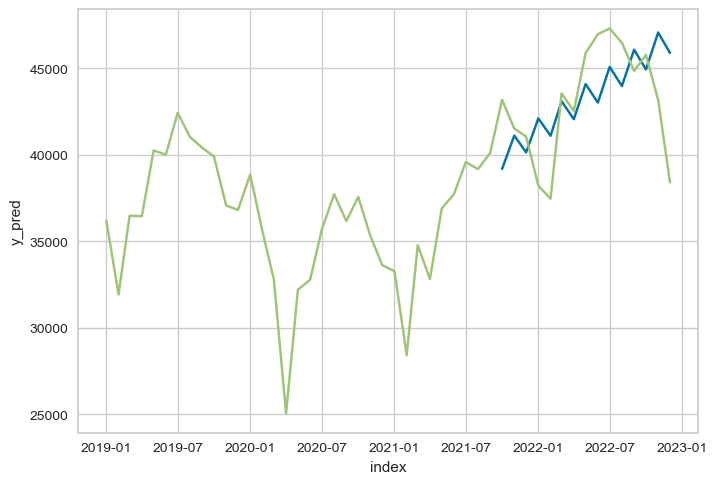

In [357]:
predictions = predict_model(best, fh = 12+3)
predictions = predictions.reset_index()
predictions['index'] = predictions['index'].apply(lambda x: x.to_timestamp())
sns.lineplot(data=predictions, x='index', y="y_pred")
#sns.lineplot(data=df_time_temp.reset_index(), x='CMPLNT_FR_DT', y="count")
sns.lineplot(data=df_time_month.reset_index(), x='index', y="count")